In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import numpy as np, sounddevice as sd, crcmod.predefined, time

Baud      = 10 # symbols per second
f0, f1    = 3, 10 # freqs
fs        = 480 # samples per second
amp       = 1.0
tx_device = 3

Tb = fs // Baud # samples per symbol
preamble  = [1,1,1,0,0,0,1,0,0,1,0] 

crc16 = crcmod.predefined.mkCrcFun('x25')

In [26]:
def bits_to_wave(bits):
    wave = []
    phase, dt = 0.0, 1 / fs
    for b in bits:
        f = f1 if b else f0
        for _ in range(Tb):
            wave.append(np.sin(phase))
            phase += 2 * np.pi * f * dt
    return np.array(wave).astype(np.float32)

[0 1 1 0 1 0 0 0]


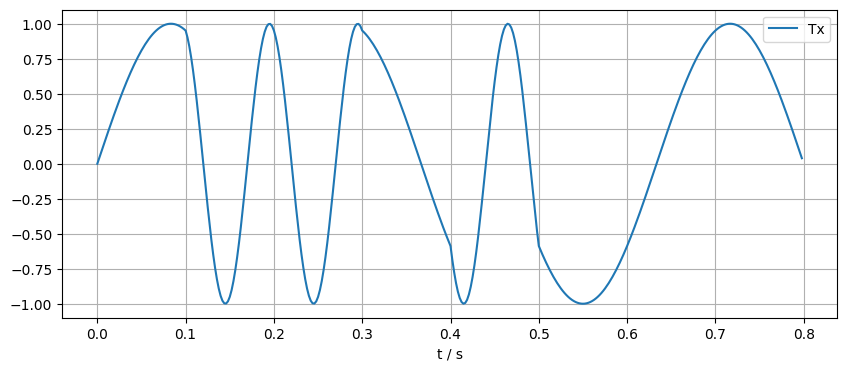

In [27]:
bits = np.unpackbits(np.frombuffer(b'h', dtype=np.uint8))
wave = bits_to_wave(bits)
print(bits)
t = np.arange(len(bits) * Tb) / fs

plt.figure(figsize=(10, 4))
plt.plot(t, wave, label="Tx")
plt.xlabel("t / s")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import numpy as np, sounddevice as sd, crcmod.predefined, time

Baud      = 10             # symbols per second  ← Slower & steadier
f0, f1    = 300, 1000    # mark / space freqs
fs        = 48000          # audio sample rate
amp       = 1.0             # 0‒1 loudness (raise for more volume!)
tx_device = 3

Tb = int(fs / Baud)         # samples per symbol
preamble  = [1,1,1,0,0,0,1,0,0,1,0] 

crc16 = crcmod.predefined.mkCrcFun('x25')

def bits_to_wave(bits):
    t     = np.arange(len(bits) * Tb) / fs
    freqs = np.where(np.repeat(bits, Tb) == 0, f0, f1)
    wave  = amp * np.sin(2 * np.pi * freqs * t)
    return wave.astype(np.float32)

def build_frame(payload: bytes) -> np.ndarray:
    pkt  = b'\x2A\x2A' + payload + crc16(payload).to_bytes(2, 'big')
    bits = np.unpackbits(np.frombuffer(pkt, dtype=np.uint8))
    frame_bits = np.concatenate((preamble, bits))
    return bits_to_wave(frame_bits)

def send(payload: bytes):
    wave = build_frame(payload)
    sd.play(wave, fs, device=tx_device, blocking=True)

text = "u r dum"
send(text.encode())

In [74]:
len("epepep i am a wompy!!")

21